In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from mpl_toolkits.mplot3d import Axes3D

In [118]:
# Parameters
T0 = 100  # initial temperature of object (degrees Celsius)
Ts = 20   # temperature of surroundings (degrees Celsius)
k = 0.1   # cooling coefficient

# Spatial parameters
L = 1     # length of object (m)
nx = 10   # number of spatial nodes
dx = L/nx # spatial step size

# Time parameters
t0 = 0    # start time
tf = 60   # end time
nt = 30  # number of time steps
dt = (tf-t0)/nt # time step

# Initialize temperature array
T = np.zeros((nx, nt+1))
T[:, 0] = T0

In [121]:
T

array([[ 80.        ,  34.15730337,  13.62959222,   2.82503202,
         -3.74514834,  -8.23679141, -11.59515355, -14.27765452,
        -16.52426747, -18.46917778, -20.19143217, -21.73983152,
        -23.14595053, -24.43126071, -25.61115125, -26.69724925,
        -27.69878067, -28.62338002, -29.47757898, -30.26710644,
        -30.99707686, -31.67211199, -32.2964225 , -32.87386527,
        -33.40798545, -33.90204916, -34.35906981, -34.78183028,
        -35.17290215, -35.53466262, -15.86930977],
       [100.        ,  82.47191011,  66.7314733 ,  54.84550384,
         45.93952294,  39.03477413,  33.45133074,  28.76218998,
         24.70485211,  21.11673413,  17.89488126,  14.97193761,
         12.30197992,   9.8521684 ,   7.59780696,   5.51940351,
          3.60090724,   1.82864061,   0.19064309,  -1.32374033,
         -2.72412413,  -4.0192591 ,  -5.21715553,  -6.3251733 ,
         -7.35009109,  -8.29816203,  -9.17516026,  -9.98642104,
        -10.73687618, -11.43108571, -12.07326668],
  

In [120]:
# Finite element method
alpha = k*dt/(dx**2)
alpha =1
A = diags([-alpha, 1+2*alpha, -alpha], [-1, 0, 1], shape=(nx, nx)).toarray()

for i in range(1, nt+1):
    b = T[:, i-1]
    b[0] -= alpha*Ts
    b[-1] -= alpha*Ts
    T[:, i] = np.linalg.solve(A, b)




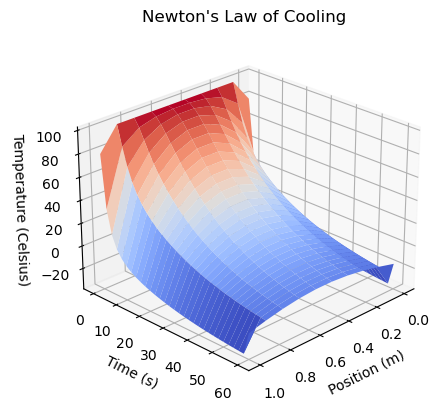

In [116]:
# Plot the results
t = np.linspace(t0, tf, nt+1)   #temporal part
x = np.linspace(0, L, nx)       #spatial part
X, T_T = np.meshgrid(x, t)      #creating regular grid

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T_T, T.T, cmap='coolwarm')
ax.set_xlabel('Position (m)')
ax.set_ylabel('Time (s)')
ax.set_zlabel('Temperature (Celsius)')
plt.title("Newton's Law of Cooling")
ax.view_init(elev=25, azim=45)
plt.show()

In [90]:
T[1]

array([100.        ,  10.31460674,   1.93334175,   5.91492959,
         9.27656824,  10.61022483,  10.46615548,   9.45856051,
         8.00214455,   6.34564842,   4.63158697,   2.9391529 ,
         1.31065409,  -0.23288899,  -1.68264765,  -3.03669069,
        -4.29690242,  -5.46719032,  -6.5524467 ,  -7.55795209,
        -8.48903745,  -9.35089805, -10.14849581, -10.88651311,
       -11.56933599, -12.20105408, -12.78546964, -13.32611127,
       -13.82624982, -14.28891496, -14.71691166, -15.11283607,
       -15.47909057, -15.81789801, -16.13131493, -16.4212439 ,
       -16.68944505, -16.93754661, -17.16705486, -17.3793632 ,
       -17.57576062, -17.75743951, -17.92550291, -18.0809712 ,
       -18.22478829, -18.35782735, -18.48089611, -18.59474178,
       -18.70005554, -18.79747682, -18.88759709, -18.97096351,
       -19.04808222, -19.11942146, -19.18541434, -19.24646155,
       -19.30293371, -19.3551737 , -19.40349869, -19.44820208,
       -19.48955527, -19.52780935, -19.56319657, -19.59